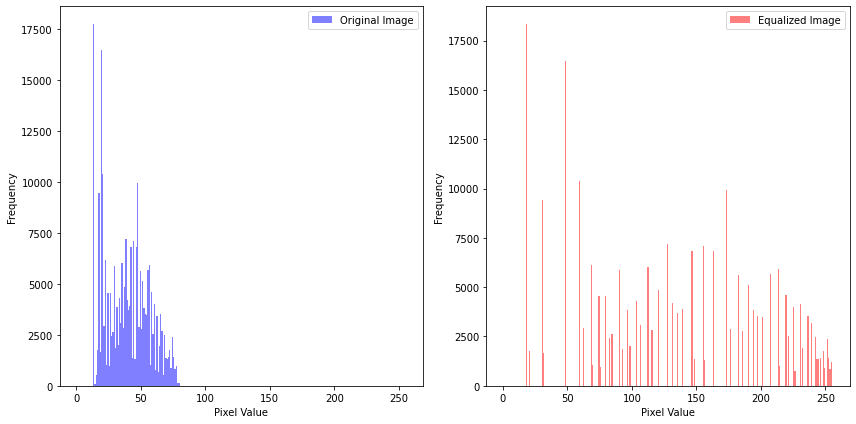

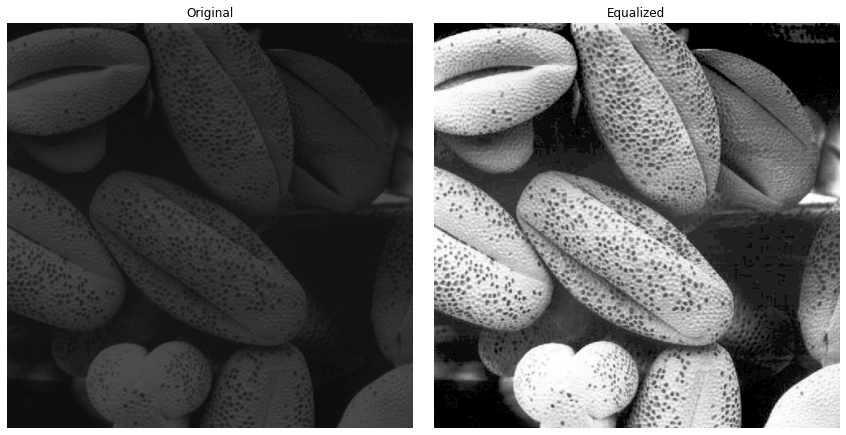

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image):
    histogram = np.zeros(256, dtype=int) 
    # histogram as a list ( index = value for pixels, value = number of pixels )
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

def compute_cumulative_histogram(histogram):
    #compute the cumulative histogram
    cumulative_histogram = histogram.cumsum()
    return cumulative_histogram

def histogram_equalization(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram = compute_histogram(gray_image)
    cumulative_histogram = compute_cumulative_histogram(histogram)
    
    num_pixels = gray_image.shape[0] * gray_image.shape[1]
    #creating a mapping array
    pixel_mapping = (cumulative_histogram * 255.0 / num_pixels).astype(int)
    #replace the pixel values by the mapped value
    equalized_image = pixel_mapping[gray_image]
    
    return equalized_image, gray_image

def plot_histograms(original_image, equalized_image):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(original_image.flatten(), bins=256, range=[0, 256], color='b', alpha=0.5, label='Original Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(equalized_image.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5, label='Equalized Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


input_path = 'shells.tif'  

 
image = cv2.imread(input_path)

   
equalized_image, gray_image = histogram_equalization(image)

    
plot_histograms(gray_image, equalized_image)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized')
plt.axis('off')

plt.tight_layout()
plt.show()
